In [1]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Ensemble model libraries
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [2]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data = load_iris()

In [4]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
info = data.data
target = data.target
print(info, target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [9]:
target_names = {target_value:target_name for target_value, target_name in enumerate(data.target_names)}
df['species_name'] = df['species'].map(target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df = df.rename(columns={'sepal length (cm)': 'SepalLengthCm', 'sepal width (cm)': 'SepalWidthCm', 'petal length (cm)': 'PetalLengthCm',
                   'petal width (cm)': 'PetalWidthCm'})

In [13]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [14]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'species', 'species_name'],
      dtype='object')

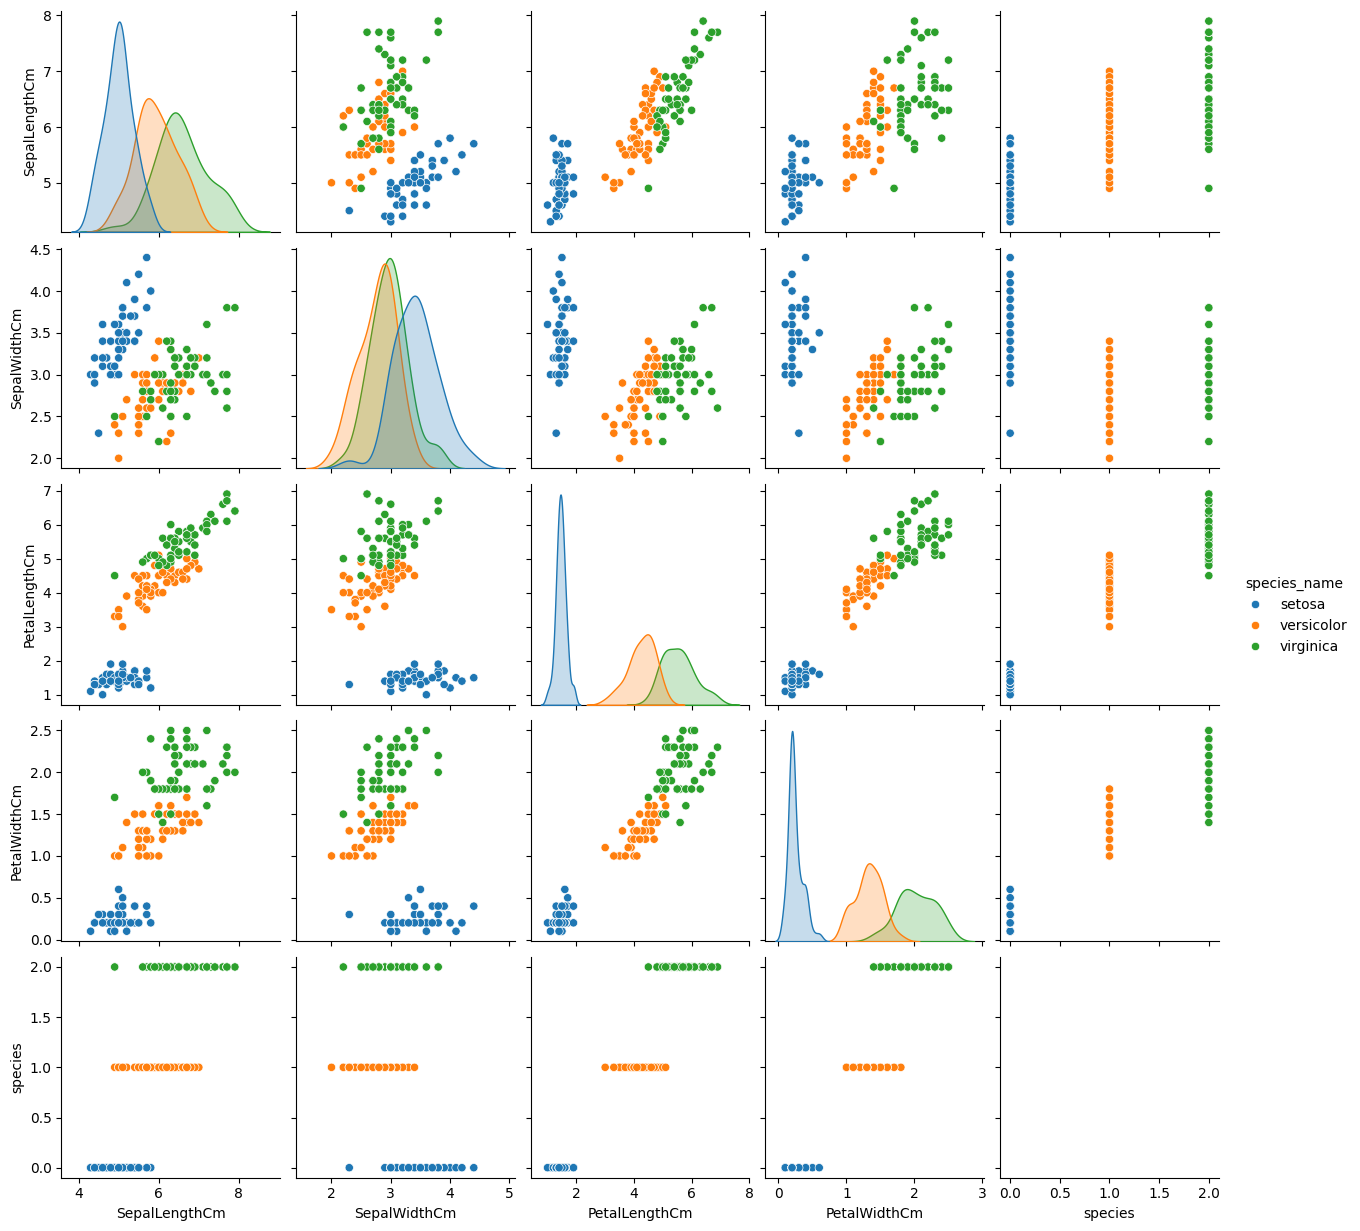

In [15]:
sns.pairplot(df, hue='species_name');

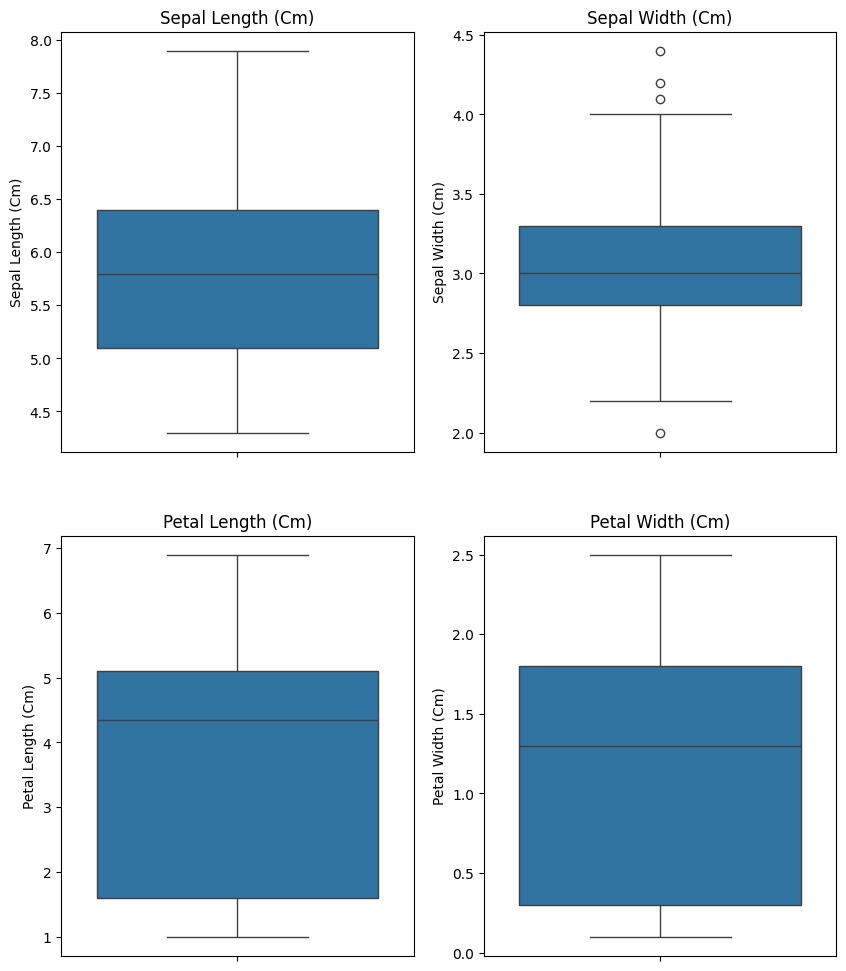

In [16]:
fig, axes = plt.subplots(2,2, figsize=(10,12))

sns.boxplot(df['SepalLengthCm'], ax=axes[0][0])
axes[0][0].set_title('Sepal Length (Cm)')
axes[0][0].set_ylabel('Sepal Length (Cm)')

sns.boxplot(df['SepalWidthCm'], ax=axes[0][1])
axes[0][1].set_title('Sepal Width (Cm)')
axes[0][1].set_ylabel('Sepal Width (Cm)')

sns.boxplot(df['PetalLengthCm'], ax=axes[1][0])
axes[1][0].set_title('Petal Length (Cm)')
axes[1][0].set_ylabel('Petal Length (Cm)')

sns.boxplot(df['PetalWidthCm'], ax=axes[1][1])
axes[1][1].set_title('Petal Width (Cm)')
axes[1][1].set_ylabel('Petal Width (Cm)')

plt.show()

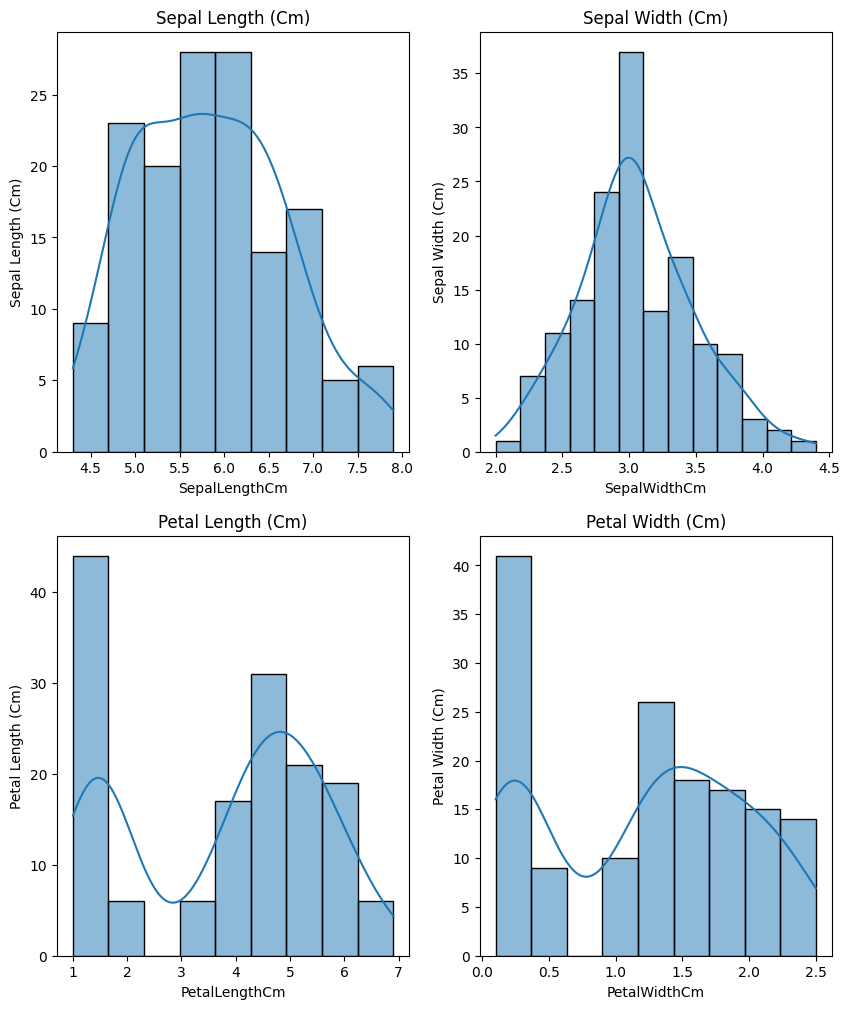

In [17]:
fig, axes = plt.subplots(2,2, figsize=(10,12))

sns.histplot(df['SepalLengthCm'], ax=axes[0][0], kde=True)
axes[0][0].set_title('Sepal Length (Cm)')
axes[0][0].set_ylabel('Sepal Length (Cm)')

sns.histplot(df['SepalWidthCm'], ax=axes[0][1], kde=True)
axes[0][1].set_title('Sepal Width (Cm)')
axes[0][1].set_ylabel('Sepal Width (Cm)')

sns.histplot(df['PetalLengthCm'], ax=axes[1][0], kde=True)
axes[1][0].set_title('Petal Length (Cm)')
axes[1][0].set_ylabel('Petal Length (Cm)')

sns.histplot(df['PetalWidthCm'], ax=axes[1][1], kde=True)
axes[1][1].set_title('Petal Width (Cm)')
axes[1][1].set_ylabel('Petal Width (Cm)')

plt.show()

In [18]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'species', 'species_name'],
      dtype='object')

In [19]:
df.drop(['species_name'], axis=1, inplace=True)

In [20]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
X= df.drop(['species'], axis=1)
y = df['species']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# lr = LogisticRegression(random_state=42, max_iter=200)
# lr.fit(X_train_scaled, y_train)
# lr_pred = lr.predict(X_test_scaled)

In [25]:
# y_test

In [26]:
# lr_pred

In [27]:
# print(classification_report(y_test, lr_pred))

In [28]:
# print(confusion_matrix(y_test, lr_pred))

In [29]:
# dt = DecisionTreeClassifier()
# dt.fit(X_train_scaled, y_train)
# dt_pred = dt.predict(X_test_scaled)

In [30]:
# print(classification_report(y_test, dt_pred))

In [31]:
# print(confusion_matrix(y_test, dt_pred))

In [32]:
# nb = GaussianNB()
# nb.fit(X_train_scaled, y_train)
# nb_pred = nb.predict(X_test_scaled)

In [33]:
# print(classification_report(y_test, nb_pred))
# print(confusion_matrix(y_test, nb_pred))

In [34]:
# knn = KNeighborsClassifier()
# knn.fit(X_train_scaled, y_train)
# knn_pred = knn.predict(X_test_scaled)

In [35]:
# print(classification_report(y_test, knn_pred))
# print(confusion_matrix(y_test, knn_pred))

In [36]:
# svc = SVC()
# svc.fit(X_train_scaled, y_train)
# svc_pred = svc.predict(X_test_scaled)

In [37]:
# print(classification_report(y_test, svc_pred))
# print(confusion_matrix(y_test, svc_pred))

In [38]:
# xgb_model = XGBClassifier(
#     learning_rate=0.01,
#     max_depth=5,
#     n_estimators=200,
#     random_state=42
# )
# xgb_model.fit(X_train_scaled, y_train)
# xgb_pred = xgb_model.predict(X_test_scaled)

# print("XGBoost Model Performance:")
# print(classification_report(y_test, xgb_pred))

In [39]:
# print(confusion_matrix(y_test, xgb_pred))

In [40]:
# rf = RandomForestClassifier()
# rf.fit(X_train_scaled, y_train)
# rf_pred = rf.predict(X_test_scaled)

In [41]:
# print(classification_report(y_test, rf_pred))
# print(confusion_matrix(y_test, rf_pred))

In [42]:
# cat = CatBoostClassifier()
# cat.fit(X_train_scaled, y_train)
# cat_pred = cat.predict(X_test_scaled)

In [43]:
# print(classification_report(y_test, cat_pred))
# print(confusion_matrix(y_test, cat_pred))

In [44]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=200),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'KNearest': KNeighborsClassifier(),
    'SVC': SVC(),
    'Catboost': CatBoostClassifier(),
    'XGBC': XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=200, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    results[name] = {
        "Training Accuracy": accuracy_score(y_train, train_pred),
        "Testing Accuracy": accuracy_score(y_test, test_pred),
        "classification": classification_report(y_test, test_pred),
        "confusion_matrix": confusion_matrix(y_test, test_pred),

    }

for model_name, accuracies in results.items():
    print(f"{model_name}:\n Training Accuracy: {accuracies['Training Accuracy']:.2f}")
    print(f" Testing Accuracy: {accuracies['Testing Accuracy']:.2f}\n")
    print(f'classification_report: \n {classification_report(y_test, test_pred)}\n')
    print(f"confusion_matrix: \n {confusion_matrix(y_test, test_pred)}\n")

Learning rate set to 0.071017
0:	learn: 1.0137398	total: 54.6ms	remaining: 54.5s
1:	learn: 0.9441843	total: 54.9ms	remaining: 27.4s
2:	learn: 0.8803398	total: 55.2ms	remaining: 18.3s
3:	learn: 0.8269238	total: 55.5ms	remaining: 13.8s
4:	learn: 0.7789716	total: 55.8ms	remaining: 11.1s
5:	learn: 0.7256284	total: 56.1ms	remaining: 9.29s
6:	learn: 0.6863398	total: 56.4ms	remaining: 8s
7:	learn: 0.6454676	total: 56.7ms	remaining: 7.03s
8:	learn: 0.6097277	total: 57ms	remaining: 6.28s
9:	learn: 0.5769872	total: 57.3ms	remaining: 5.67s
10:	learn: 0.5476894	total: 57.6ms	remaining: 5.18s
11:	learn: 0.5181646	total: 57.9ms	remaining: 4.77s
12:	learn: 0.4898136	total: 58ms	remaining: 4.41s
13:	learn: 0.4670904	total: 58.4ms	remaining: 4.11s
14:	learn: 0.4481021	total: 58.6ms	remaining: 3.85s
15:	learn: 0.4266867	total: 58.9ms	remaining: 3.62s
16:	learn: 0.4050574	total: 59.1ms	remaining: 3.42s
17:	learn: 0.3865493	total: 59.3ms	remaining: 3.24s
18:	learn: 0.3742278	total: 59.6ms	remaining: 3.08s

/Users/gopalakrishnanm/anaconda3/envs/irisDataset/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [01:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


LogisticRegression:
 Training Accuracy: 0.97
 Testing Accuracy: 0.97

classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


confusion_matrix: 
 [[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]

DecisionTree:
 Training Accuracy: 1.00
 Testing Accuracy: 0.93

classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97       

In [48]:
import pickle

In [57]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

xgbc_model = models['XGBC'] 
with open('XGBC.pkl', 'wb') as file:
    pickle.dump(xgbc_model, file) 

In [58]:
with open('XGBC.pkl', 'rb') as file:
    model = pickle.load(file)

In [59]:
print("Loaded model type:", type(model))

Loaded model type: <class 'xgboost.sklearn.XGBClassifier'>


In [60]:
result = model.score(X_test_scaled, y_test)
print(result)

0.9666666666666667
